<a href="https://colab.research.google.com/github/ravali217/PCA-Principal-Component-Analysis-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
iris=load_iris()

In [5]:
x=iris.data
y=iris.target

In [6]:
x_scaled=StandardScaler().fit_transform(x)


In [7]:
x.shape

(150, 4)

Apply PCA and visualize screen plot


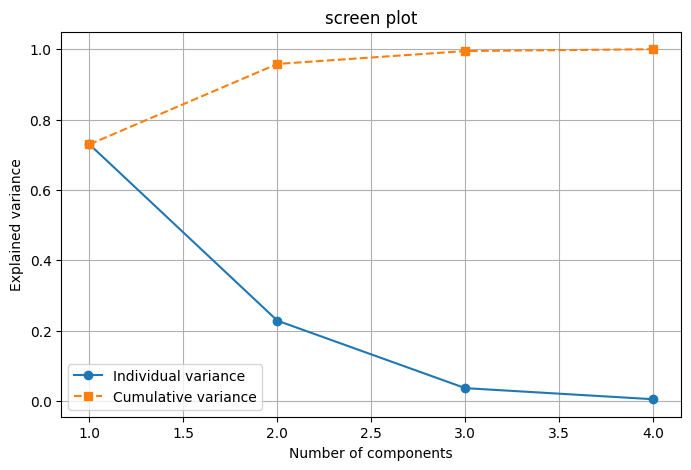

In [12]:
pca=PCA()
x_pca=pca.fit_transform(x_scaled)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, 'o-', label='Individual variance')

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_), 's--', label='Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.grid(True)
plt.legend()
plt.title("screen plot")
plt.show()


In [13]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"reduced shape {x_reduced.shape}")

reduced shape (150, 2)


Visualise top 2 components


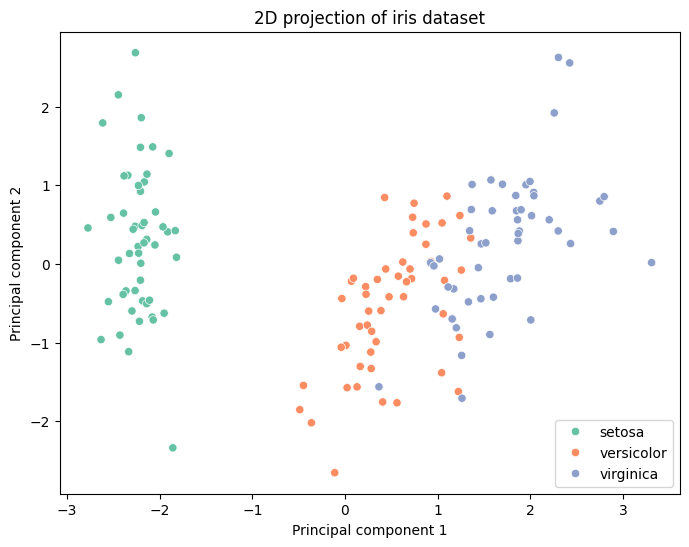

In [15]:
pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0],y=x_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("2D projection of iris dataset")
plt.show()


In [16]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [18]:
  # change path if needed
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path='/content/drive/My Drive/marketing_campaign.csv'
df = pd.read_csv(path)
df.head()


Mounted at /content/drive


,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [28]:

print(df.isnull().sum())


ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: int64


In [22]:
print(df.shape)
print(df.columns)

(2240, 1)
Index(['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], dtype='object')


In [34]:
print(df.dtypes)


ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    object
dtype: object


✅ Using file: /content/drive/MyDrive/marketing_campaign.csv
✅ Loaded shape: (2240, 29)
Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

✅ Numeric-only shape (after drops): (2240, 23)
Numeric columns count: 23
✅ Missing values handled + standardized: (2240, 23)


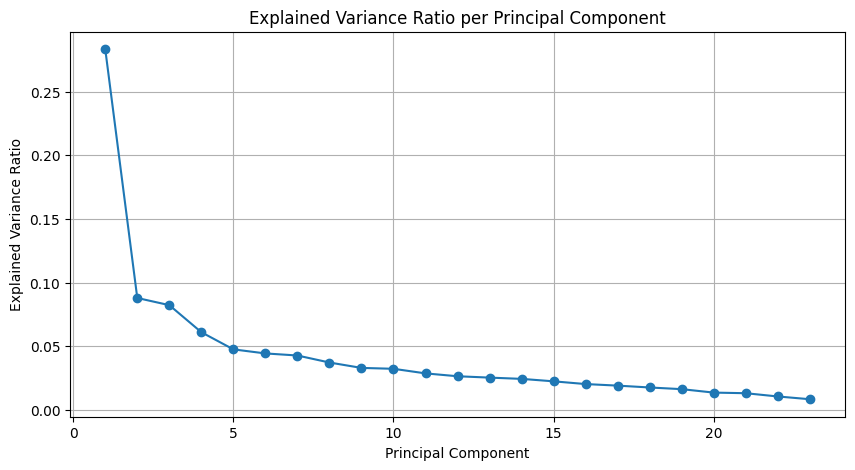

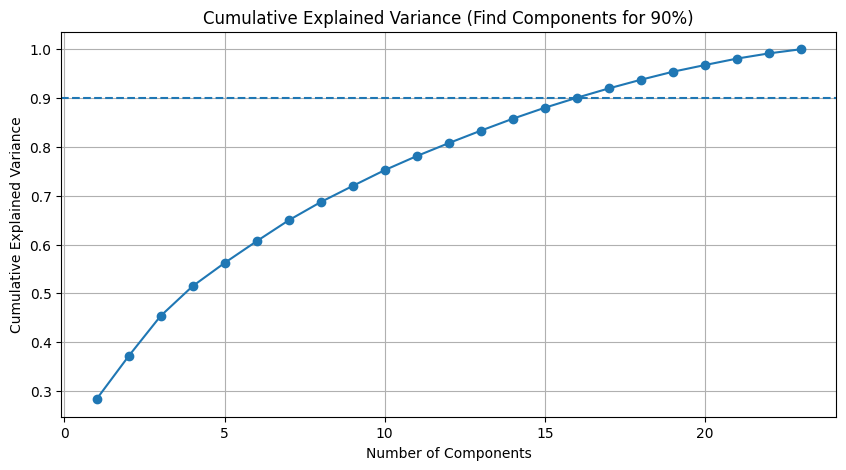

✅ Components needed for ≥90% variance: 16 (cumulative=0.901)
✅ PCA-reduced (90% variance) shape: (2240, 16)

🔎 Top features contributing to PC1 (by absolute loading):
NumCatalogPurchases    0.318640
MntMeatProducts        0.312452
MntWines               0.306416
Income                 0.290943
NumStorePurchases      0.282800
MntFishProducts        0.276907
MntSweetProducts       0.269177
MntFruits              0.267206
Kidhome                0.255140
NumWebVisitsMonth      0.248110
dtype: float64

🔎 Top features contributing to PC2 (by absolute loading):
Teenhome             0.540714
NumDealsPurchases    0.457841
NumWebPurchases      0.352291
Year_Birth           0.341897
NumStorePurchases    0.213296
AcceptedCmp5         0.185352
NumWebVisitsMonth    0.158347
MntWines             0.155905
AcceptedCmp1         0.152186
Response             0.136383
dtype: float64

🧠 Business interpretation helper:
- PC1 usually captures 'overall spending/engagement intensity' if spend columns dominate 

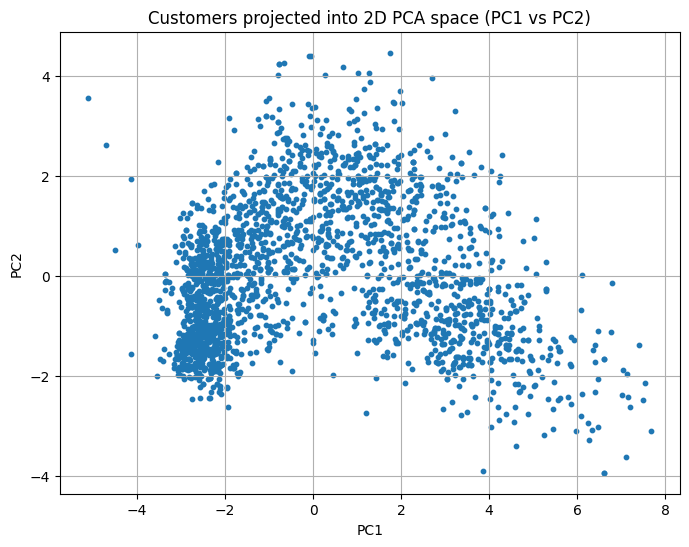


📊 Comparison (KMeans)
Original (standardized)  | silhouette=0.1921 | time=0.2161 sec | dims=23
PCA (≥90% variance)      | silhouette=0.2460 | time=0.0177 sec | dims=16


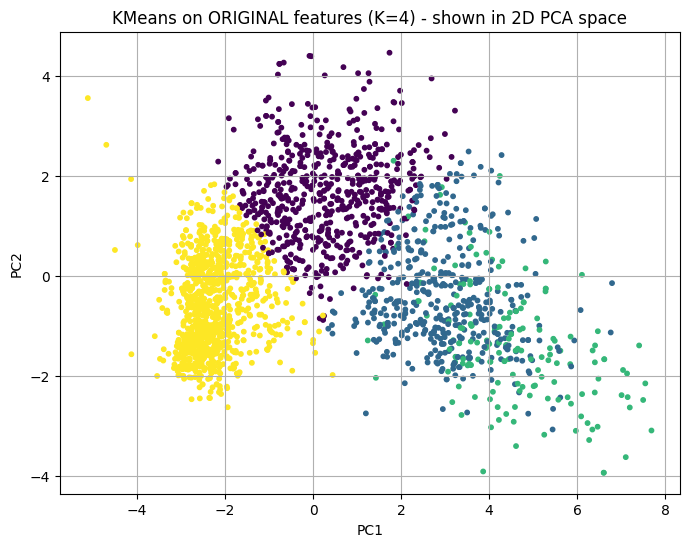

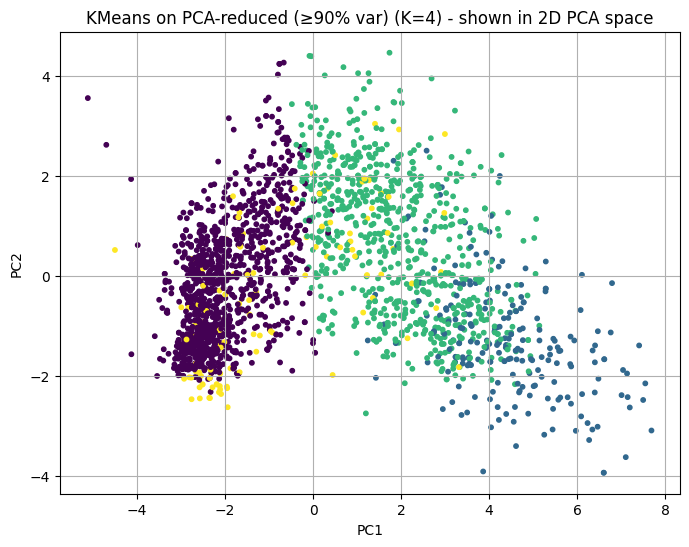

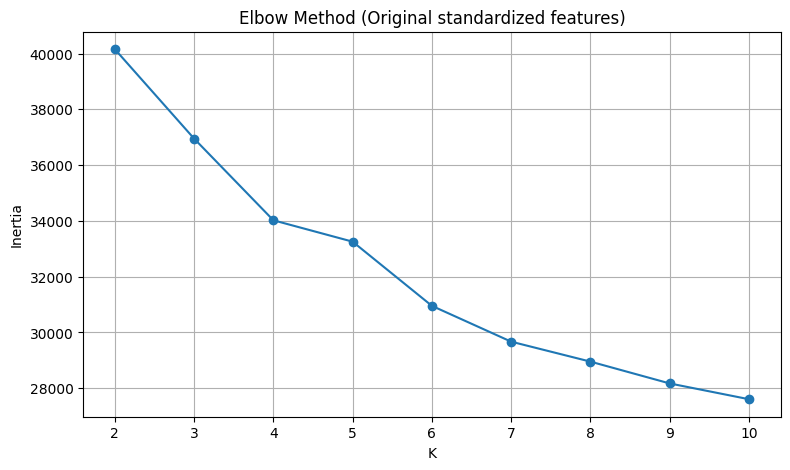


✅ Done. Now write your report using:
1) n_components_90 value
2) top features for PC1 & PC2
3) silhouette + time comparison
4) visual separation from the PCA scatter plots


In [36]:
# Customer Behavior Segmentation for Retail Optimization (Customer Personality Analysis - Kaggle)
# ✅ Part 1: Prep  ✅ Part 2: PCA  ✅ Part 3: Interpretation  ✅ Part 4: KMeans compare
# Run this as ONE CELL in Colab / Jupyter

import os, time, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ----------------------------
# 0) LOAD DATASET
# ----------------------------
# Option A (recommended): Upload "marketing_campaign.csv" to Colab, or keep it in Google Drive.
# The Kaggle dataset file is typically: marketing_campaign.csv (TAB-separated)

# Try to auto-find the file in common locations
candidate_paths = []
candidate_paths += glob.glob("/content/**/marketing_campaign.csv", recursive=True)
candidate_paths += glob.glob("/content/**/marketing_campaign*.csv", recursive=True)
candidate_paths += glob.glob("/content/drive/**/marketing_campaign.csv", recursive=True)
candidate_paths += glob.glob("/content/drive/**/marketing_campaign*.csv", recursive=True)

if len(candidate_paths) == 0:
    raise FileNotFoundError(
        "Could not find marketing_campaign.csv.\n"
        "➡️ Upload it to /content/ OR place it in Google Drive and mount it.\n"
        "Then re-run this cell."
    )

file_path = candidate_paths[0]
print("✅ Using file:", file_path)

# IMPORTANT: Kaggle file is TAB-separated
df = pd.read_csv(file_path, sep="\t")
print("✅ Loaded shape:", df.shape)
print("Columns:", list(df.columns))

# ----------------------------
# 1) PART 1 – DATA PREPARATION
# ----------------------------
# Select only numerical features relevant to customer behavior.
# (This dataset includes many numeric purchase/spend/visits + campaign response columns.)
# We'll keep numeric columns and drop obvious identifiers / constants if present.

# Convert "Dt_Customer" to datetime (optional; then we won't include it in numeric selection)
if "Dt_Customer" in df.columns:
    df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce")

# Numeric feature selection
num_df = df.select_dtypes(include=[np.number]).copy()

# Drop ID-like or constant columns if present
drop_candidates = [c for c in ["ID", "Z_CostContact", "Z_Revenue"] if c in num_df.columns]
num_df.drop(columns=drop_candidates, inplace=True, errors="ignore")

print("\n✅ Numeric-only shape (after drops):", num_df.shape)
print("Numeric columns count:", num_df.shape[1])

# Handle missing values (median)
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(num_df)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("✅ Missing values handled + standardized:", X_scaled.shape)

# ----------------------------
# 2) PART 2 – PCA IMPLEMENTATION
# ----------------------------
pca_full = PCA(random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Plot explained variance ratio + cumulative
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained) + 1), explained, marker="o")
plt.title("Explained Variance Ratio per Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cum_explained) + 1), cum_explained, marker="o")
plt.axhline(0.90, linestyle="--")
plt.title("Cumulative Explained Variance (Find Components for 90%)")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Determine number of components to retain at least 90% variance
n_components_90 = int(np.argmax(cum_explained >= 0.90) + 1)
print(f"✅ Components needed for ≥90% variance: {n_components_90} (cumulative={cum_explained[n_components_90-1]:.3f})")

# Reduce dataset to those components
pca_90 = PCA(n_components=n_components_90, random_state=42)
X_pca_90 = pca_90.fit_transform(X_scaled)
print("✅ PCA-reduced (90% variance) shape:", X_pca_90.shape)

# Also keep a 2D PCA for visualization
pca_2 = PCA(n_components=2, random_state=42)
X_pca_2 = pca_2.fit_transform(X_scaled)

# ----------------------------
# 3) PART 3 – INTERPRETATION (PC1, PC2 feature contributions)
# ----------------------------
feature_names = list(num_df.columns)

# Loadings (contribution strength) for first 2 PCs from the FULL PCA fit
# components_[pc_index, feature_index]
loadings_pc1 = pd.Series(pca_full.components_[0], index=feature_names)
loadings_pc2 = pd.Series(pca_full.components_[1], index=feature_names)

top_pc1 = loadings_pc1.abs().sort_values(ascending=False).head(10)
top_pc2 = loadings_pc2.abs().sort_values(ascending=False).head(10)

print("\n🔎 Top features contributing to PC1 (by absolute loading):")
print(top_pc1)

print("\n🔎 Top features contributing to PC2 (by absolute loading):")
print(top_pc2)

print("\n🧠 Business interpretation helper:")
print("- PC1 usually captures 'overall spending/engagement intensity' if spend columns dominate (MntWines, MntMeatProducts, NumStorePurchases, etc.).")
print("- PC2 often captures 'channel preference / promotion sensitivity / recency-return behavior' depending on which features dominate (NumWebVisitsMonth, NumWebPurchases, NumDealsPurchases, Recency, Complain, etc.).")
print("👉 Use the printed top features above to write your final business meaning for PC1 and PC2.")

# ----------------------------
# 4) PART 4 – PRACTICAL APPLICATION
#   - Visualize in 2D PCA space
#   - KMeans on original standardized vs PCA-reduced
#   - Compare silhouette + time + separation quality
# ----------------------------

# Choose K (you can tune this; common start is 3–6). We'll try K=4 and also show quick elbow helper.
K = 4

# Visualize customers in 2D PCA space (unclustered)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], s=10)
plt.title("Customers projected into 2D PCA space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# --- KMeans on ORIGINAL (standardized numeric) ---
t0 = time.perf_counter()
kmeans_orig = KMeans(n_clusters=K, random_state=42, n_init="auto")
labels_orig = kmeans_orig.fit_predict(X_scaled)
t1 = time.perf_counter()
time_orig = t1 - t0
sil_orig = silhouette_score(X_scaled, labels_orig)

# --- KMeans on PCA-REDUCED (90% variance) ---
t0 = time.perf_counter()
kmeans_pca = KMeans(n_clusters=K, random_state=42, n_init="auto")
labels_pca = kmeans_pca.fit_predict(X_pca_90)
t1 = time.perf_counter()
time_pca = t1 - t0
sil_pca = silhouette_score(X_pca_90, labels_pca)

print("\n📊 Comparison (KMeans)")
print(f"Original (standardized)  | silhouette={sil_orig:.4f} | time={time_orig:.4f} sec | dims={X_scaled.shape[1]}")
print(f"PCA (≥90% variance)      | silhouette={sil_pca:.4f} | time={time_pca:.4f} sec | dims={X_pca_90.shape[1]}")

# Cluster separation quality: show both clusterings in the same 2D PCA plot
# 1) Labels from original KMeans projected into PCA2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=labels_orig, s=10)
plt.title(f"KMeans on ORIGINAL features (K={K}) - shown in 2D PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 2) Labels from PCA KMeans shown in PCA2
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=labels_pca, s=10)
plt.title(f"KMeans on PCA-reduced (≥90% var) (K={K}) - shown in 2D PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Optional: quick elbow curve (inertia) on original standardized data
inertias = []
Ks = range(2, 11)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(9, 5))
plt.plot(list(Ks), inertias, marker="o")
plt.title("Elbow Method (Original standardized features)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

print("\n✅ Done. Now write your report using:")
print("1) n_components_90 value")
print("2) top features for PC1 & PC2")
print("3) silhouette + time comparison")
print("4) visual separation from the PCA scatter plots")
